In [2]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [20]:
link="http://fund.eastmoney.com/f10/F10DataApi.aspx?type=lsjz&code=000311&page=1&sdate=2018-01-02&edate=2020-01-10&per=20"
headers={
    'user-agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36",
}
r=requests.get(link,headers=headers)

s1 = requests.get(link)
s1.encoding = 'utf-8'
soup1=BeautifulSoup(s1.text,'lxml')
fund_detail=soup1.find_all('tr')

###获取总页数
pattern=re.compile(r'pages:(.*),')
html=r.text
result=re.search(pattern,html).group(1)
pages=int(result)
pages



data_list=[]
for i in range(1, pages+1):
    link='http://fund.eastmoney.com/f10/F10DataApi.aspx?type=lsjz&code=000311&page='+str(i)+'&sdate=2018-01-02&edate=2020-01-10&per=20'
    r=requests.get(link,headers=headers)
    s1 = requests.get(link)
    s1.encoding = 'utf-8'
    soup1=BeautifulSoup(s1.text,'lxml')
    fund_detail=soup1.find_all('tr')
    for each in fund_detail:
       if each.td is None:
        continue
       else:
        date=each.td.text.strip()##only first td
        unit_value=each.find('td',class_='tor bold').text.strip()##first tor bold
        cum_value=each.find('td',class_='tor bold').next_sibling.text.strip()##second td
        percent=each.find('td').next_sibling.next_sibling.next_sibling.text.strip()
        purchase_condition=each.find('td').next_sibling.next_sibling.next_sibling.next_sibling.text.strip()
        sale_condition=each.find('td').next_sibling.next_sibling.next_sibling.next_sibling.next_sibling.text.strip()
        dividend=each.find('td',class_='red unbold').text.strip()
        code= '000311'
        name=  '景顺长城沪深300增强'
        data_list.append([code, name, date,unit_value, cum_value, percent,purchase_condition, sale_condition, dividend])


    

In [23]:
len(data_list)

497

In [31]:
fund_000311 = pd.DataFrame(data_list)
fund_000311.columns=['代码','名字','时间','单位净值','累计净值','涨跌幅','申购','赎回','分红']

Text(0.5, 1.0, 'Fund 000311 HuSheng 300 ')

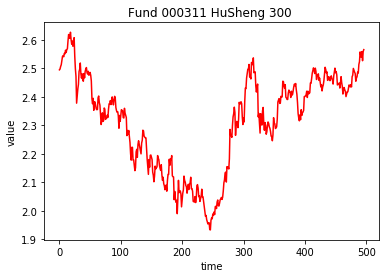

In [33]:
##画出走势图(累计净值)，共1328个交易日，累计净值=单位净值+累计分红
cum_price=fund_000311[['累计净值']]
cum_price=np.array(cum_price)
cum_price=cum_price.tolist()
cum_value=list()
t = np.arange(0.0, 497.0, 1)
for each in reversed(cum_price):##倒序 从头开始
 cum_price=float(*each)
 cum_value.append(cum_price)
plt.plot(t,cum_value,'r-')
plt.ylabel('value')
plt.xlabel('time') 
plt.title('Fund 000311 HuSheng 300 ')

Text(0.5, 1.0, 'Fund 000311 HuSheng 300 ')

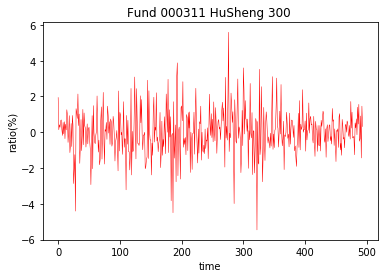

In [36]:
##涨跌情况
percent=fund_000311[['涨跌幅']]
percent=np.array(percent)
percent=percent.tolist()
while [''] in percent:
 percent.remove([''])#去除三个空白值
percent_val=[]
t = np.arange(0.0, 494.0, 1)
i=1
for each in reversed(percent):##倒序 从头开始
   each=float(str(*each).strip('%'))
   percent_val.append(each)
   i=i+1  
plt.plot(t,percent_val,'r-',linewidth=0.5)
plt.ylabel('ratio(%)')
plt.xlabel('time') 
plt.title('Fund 000311 HuSheng 300 ')
##可以看到在第二百到第三百个交易日波动率明显变大，400到500明显波动率小。

In [343]:
##基金定投研究
unit_price=fund_000311[['单位净值']]
unit_price=np.array(unit_price)
unit_price=unit_price.tolist()


In [353]:
##查出分红情况
dividend=fund_000311.loc[fund_000311['分红送配'] != '']
dividend

,_id,净值日期,分红送配,单位净值,基金代码,基金名称,日增长率,申购状态,累计净值,赎回状态
406,5cb2f9a7c15b9b56fb19187d,2017-08-15,每份派现金0.1500元,1.9260,000311,景顺长城沪深300增强,0.34%,限制大额申购,2.2660,开放赎回
413,5cb2f9a7c15b9b56fb191884,2017-08-04,每份派现金0.1900元,2.0790,000311,景顺长城沪深300增强,-0.70%,限制大额申购,2.2690,开放赎回


In [499]:
###假如从15年6月8日高位开始定投至今，对比一次性投入。 金额=100000。
###一次性投入：
pie=100000/2.453##份额
present_value_once=pie*2.472
(present_value_once-100000)/100000##大约收益率0.77%

0.007745617611088528

In [500]:
###假如从15年6月8日高位开始定投至今，对比一次性投入。 金额=100000。
###隔五个交易日定投一次：
unit_price_new_1=unit_price[0:406:5]
unit_price_new_2=unit_price[407:413:5]
unit_price_new_3=unit_price[414:942:5]
unit_price_new_1=np.array(unit_price_new_1)
unit_price_new_2=np.array(unit_price_new_2)
unit_price_new_3=np.array(unit_price_new_3)
unit_price_new_1=unit_price_new_1.tolist()
unit_price_new_2=unit_price_new_2.tolist()
unit_price_new_3=unit_price_new_3.tolist()
each_amount=100000/(len(unit_price_new_1)+len(unit_price_new_2)+len(unit_price_new_3))
each_pie_1=[]
for each in (unit_price_new_1):##倒序 从头开始
 each=float(*each)
 pie=each_amount/each
 each_pie_1.append(pie)
each_pie_2=[]
for each in (unit_price_new_2):##倒序 从头开始
 each=float(*each)
 pie=each_amount/each
 each_pie_2.append(pie)
each_pie_3=[]
for each in (unit_price_new_3):##倒序 从头开始
 each=float(*each)
 pie=each_amount/each
 each_pie_3.append(pie)
dividend_add=sum(each_pie_3)*0.19+(sum(each_pie_3)+sum(each_pie_2))*0.15
(dividend_add+(sum(each_pie_3)+sum(each_pie_2)+sum(each_pie_1))*2.132-100000)/100000##大约收益率25% 


0.2487520514881557

In [401]:
###假如从15年6月8日高位开始定投至今，对比一次性投入。 金额=100000。
###每个交易日定投一次：
unit_price_new_1=unit_price[0:406]
unit_price_new_2=unit_price[407:413]
unit_price_new_3=unit_price[414:937]
unit_price_new_1=np.array(unit_price_new_1)
unit_price_new_2=np.array(unit_price_new_2)
unit_price_new_3=np.array(unit_price_new_3)
unit_price_new_1=unit_price_new_1.tolist()
unit_price_new_2=unit_price_new_2.tolist()
unit_price_new_3=unit_price_new_3.tolist()
each_amount=100000/(len(unit_price_new_1)+len(unit_price_new_2)+len(unit_price_new_3))
each_pie_1=[]
for each in (unit_price_new_1):##倒序 从头开始
 each=float(*each)
 pie=each_amount/each
 each_pie_1.append(pie)
each_pie_2=[]
for each in (unit_price_new_2):##倒序 从头开始
 each=float(*each)
 pie=each_amount/each
 each_pie_2.append(pie)
each_pie_3=[]
for each in (unit_price_new_3):##倒序 从头开始
 each=float(*each)
 pie=each_amount/each
 each_pie_3.append(pie)
dividend_add=sum(each_pie_3)*0.19+(sum(each_pie_3)+sum(each_pie_2))*0.15
(dividend_add+(sum(each_pie_3)+sum(each_pie_2)+sum(each_pie_1))*2.132-100000)/100000##大约收益率25.3% 

##可见每个交易日定投与每周定投并无很大区别。
##为方便计算，忽略了时间价值，目的阐述定投好处。如果考虑时间价值则定投必然优于一次性买入。

0.2529015983109204

In [502]:
###假如从16年1月28日低位开始定投至今，对比一次性投入。 金额=100000。
###once：
pie=100000/1.4370##份额##包含两次分红用累计净值便可
present_value_once=pie*2.472
(present_value_once-100000)/100000##大约收益率72%

0.720250521920668

In [503]:
###假如从16年1月28日低位开始定投至今，对比一次性投入。 金额=100000。
###每5个交易日定投一次：
unit_price_new_1=unit_price[0:406]
unit_price_new_2=unit_price[407:413]
unit_price_new_3=unit_price[414:783]
unit_price_new_1=np.array(unit_price_new_1)
unit_price_new_2=np.array(unit_price_new_2)
unit_price_new_3=np.array(unit_price_new_3)
unit_price_new_1=unit_price_new_1.tolist()
unit_price_new_2=unit_price_new_2.tolist()
unit_price_new_3=unit_price_new_3.tolist()
each_amount=100000/(len(unit_price_new_1)+len(unit_price_new_2)+len(unit_price_new_3))
each_pie_1=[]
for each in (unit_price_new_1):##倒序 从头开始
 each=float(*each)
 pie=each_amount/each
 each_pie_1.append(pie)
each_pie_2=[]
for each in (unit_price_new_2):##倒序 从头开始
 each=float(*each)
 pie=each_amount/each
 each_pie_2.append(pie)
each_pie_3=[]
for each in (unit_price_new_3):##倒序 从头开始
 each=float(*each)
 pie=each_amount/each
 each_pie_3.append(pie)
dividend_add=sum(each_pie_3)*0.19+(sum(each_pie_3)+sum(each_pie_2))*0.15
(dividend_add+(sum(each_pie_3)+sum(each_pie_2)+sum(each_pie_1))*2.132-100000)/100000##大约收益率22.17% 
##可见定投收益率比较稳定，而一次性虽然可能获取更高收益但是最终收益率的波动性比较大。



0.22174400565187868

In [469]:
###模拟
##定投
times= np.arange(414, 1327, 1)
final_percent=[]
for i in times:
 each_pie_1=[]
 each_pie_2=[]
 each_pie_3=[]
 unit_price_new_1=unit_price[0:406]
 unit_price_new_2=unit_price[407:413]
 unit_price_new_3=unit_price[414:i]
 unit_price_new_1=np.array(unit_price_new_1)
 unit_price_new_2=np.array(unit_price_new_2)
 unit_price_new_3=np.array(unit_price_new_3)
 unit_price_new_1=unit_price_new_1.tolist()
 unit_price_new_2=unit_price_new_2.tolist()
 unit_price_new_3=unit_price_new_3.tolist()
 each_amount=100000/(len(unit_price_new_1)+len(unit_price_new_2)+len(unit_price_new_3))
 
 for each in (unit_price_new_1):##倒序 从头开始
  each=float(*each)
  pie=each_amount/each
  each_pie_1.append(pie)
 
 for each in (unit_price_new_2):##倒序 从头开始
  each=float(*each)
  pie=each_amount/each
  each_pie_2.append(pie)
 
 for each in (unit_price_new_3):##倒序 从头开始
  each=float(*each)
  pie=each_amount/each
  each_pie_3.append(pie)
 dividend_add=sum(each_pie_3)*0.19+(sum(each_pie_3)+sum(each_pie_2))*0.15
 final_percent.append((dividend_add+(sum(each_pie_3)+sum(each_pie_2)+sum(each_pie_1))*2.132-100000)/100000)
final_percent_test=pd.DataFrame(final_percent)

In [504]:
final_percent_test.describe()

,0
count,913.000000
mean,0.247417
std,0.105737
min,0.105204
25%,0.159612
50%,0.243204
75%,0.295816
max,0.497570


Text(0.5, 1.0, 'Fund 000311 automatic investment ')

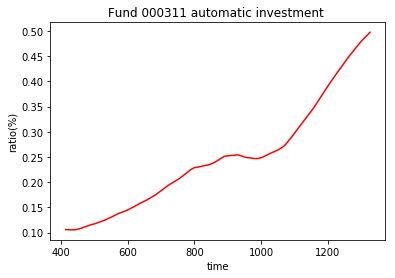

In [510]:
t = np.arange(414, 1327.0, 1)
plt.plot(t,final_percent_test,'r-')
plt.ylabel('ratio(%)')
plt.xlabel('time') 
plt.title('Fund 000311 automatic investment ')

(array([ 65.,  38.,  29.,  23.,  30.,  23.,  22.,  23.,  19.,  16.,  15.,
         19.,  19.,  16.,  14.,  33.,  41.,  19., 142.,  25.,  20.,  12.,
         10.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   7.,   8.,
          8.,   7.,   8.,   8.,   8.,   9.,   8.,   9.,   8.,   9.,   9.,
          9.,   9.,  10.,  10.,  12.,  12.]),
 array([0.10520361, 0.11305093, 0.12089825, 0.12874557, 0.13659289,
        0.14444022, 0.15228754, 0.16013486, 0.16798218, 0.1758295 ,
        0.18367682, 0.19152414, 0.19937146, 0.20721879, 0.21506611,
        0.22291343, 0.23076075, 0.23860807, 0.24645539, 0.25430271,
        0.26215004, 0.26999736, 0.27784468, 0.285692  , 0.29353932,
        0.30138664, 0.30923396, 0.31708128, 0.32492861, 0.33277593,
        0.34062325, 0.34847057, 0.35631789, 0.36416521, 0.37201253,
        0.37985985, 0.38770718, 0.3955545 , 0.40340182, 0.41124914,
        0.41909646, 0.42694378, 0.4347911 , 0.44263843, 0.45048575,
        0.45833307, 0.46618039, 0.47402771, 0.

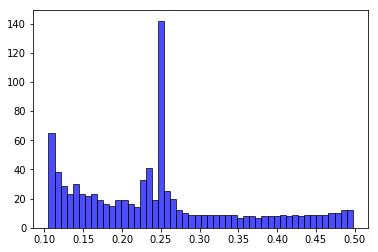

In [465]:
plt.hist(final_percent, bins=50,facecolor="blue", edgecolor="black", alpha=0.7)



In [473]:
###模拟
##一次
new_present_value_once=[]
unit_price_new=unit_price[414:1327]
for i in unit_price_new:
 i=float(*i)
 pie=100000/i ##份额
 present_value_once=pie*2.472
 new_present_value_once.append((present_value_once-100000)/100000)
new_present_value_once_test=pd.DataFrame(new_present_value_once)


In [474]:
new_present_value_once_test.describe()

,0
count,913.000000
mean,0.675401
std,0.503908
min,0.007746
25%,0.301053
50%,0.493656
75%,1.253418
max,1.672432


Text(0.5, 1.0, 'Fund 000311 normal investment ')

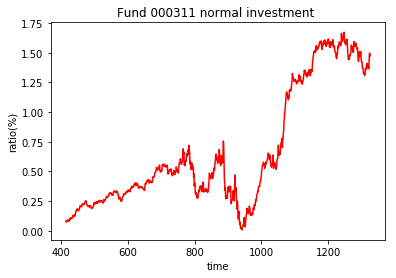

In [512]:
plt.plot(t,new_present_value_once_test,'r-')
plt.ylabel('ratio(%)')
plt.xlabel('time') 
plt.title('Fund 000311 normal investment ')

(array([10.,  7., 20., 23., 16., 36., 37., 49., 40., 67., 51., 39., 21.,
        22., 33., 41., 55., 30., 20., 19.,  5.,  6.,  4.,  1.,  1.,  1.,
         0.,  1.,  1.,  1.,  1.,  1.,  2.,  5.,  4.,  6.,  5., 20., 12.,
        23., 17.,  5.,  7., 16., 18., 20., 46., 35.,  9.,  4.]),
 array([0.00774562, 0.04103935, 0.07433309, 0.10762683, 0.14092056,
        0.1742143 , 0.20750804, 0.24080177, 0.27409551, 0.30738924,
        0.34068298, 0.37397672, 0.40727045, 0.44056419, 0.47385793,
        0.50715166, 0.5404454 , 0.57373913, 0.60703287, 0.64032661,
        0.67362034, 0.70691408, 0.74020782, 0.77350155, 0.80679529,
        0.84008903, 0.87338276, 0.9066765 , 0.93997023, 0.97326397,
        1.00655771, 1.03985144, 1.07314518, 1.10643892, 1.13973265,
        1.17302639, 1.20632012, 1.23961386, 1.2729076 , 1.30620133,
        1.33949507, 1.37278881, 1.40608254, 1.43937628, 1.47267001,
        1.50596375, 1.53925749, 1.57255122, 1.60584496, 1.6391387 ,
        1.67243243]),
 <a list of 50

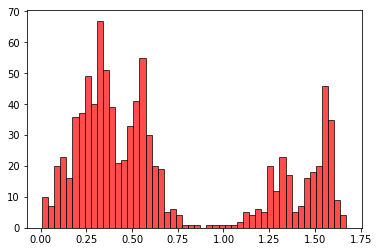

In [466]:
plt.hist(new_present_value_once, bins=50,facecolor="red", edgecolor="black", alpha=0.7)

In [497]:
###短线--v型走势
###模拟
##定投
each_pie_1=[]

unit_price_new_1=unit_price[0:310:5]

unit_price_new_1=np.array(unit_price_new_1)

unit_price_new_1=unit_price_new_1.tolist()

each_amount=100000/(len(unit_price_new_1))
 
for each in (unit_price_new_1):##倒序 从头开始
  each=float(*each)
  pie=each_amount/each
  each_pie_1.append(pie)
(sum(each_pie_1)*2.132-100000)/100000


0.1259953947969366

In [491]:
unit_price[310]


['2.1580']

In [495]:

###once：
pie=100000/2.1580##份额##包含两次分红用累计净值便可
present_value_once=pie*2.132
(present_value_once-100000)/100000##大约收益率-0.012%

-0.01204819277108414